In [7]:
!pip install --upgrade seaborn matplotlib
!pip install pydot

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.9.3-cp39-cp39-win_amd64.whl (7.8 MB)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.000

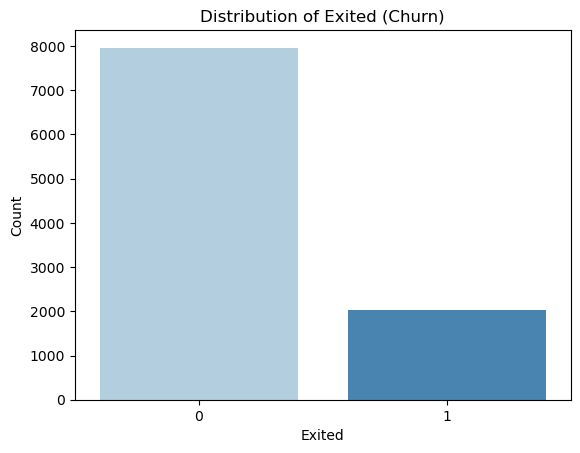

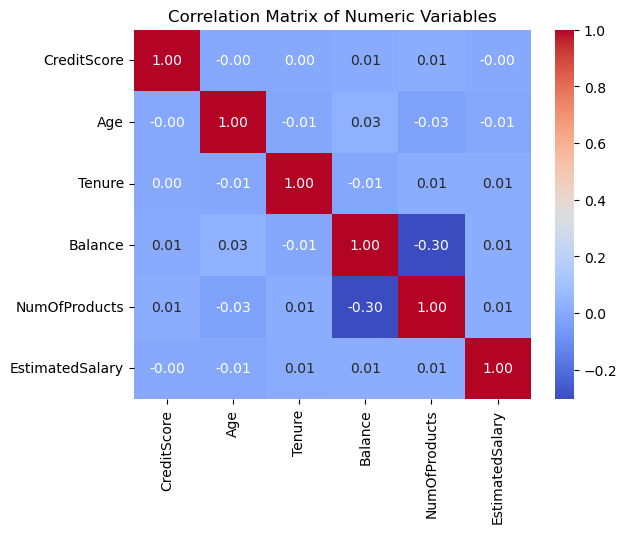

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Optimization terminated successfully.
         Current function value: 0.439599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.1324
Time:                        10:31:34   Log-Likelihood:                -3077.2
converged:                       True   LL-Null:                       -3546.7
Covariance Type:            nonrobust 

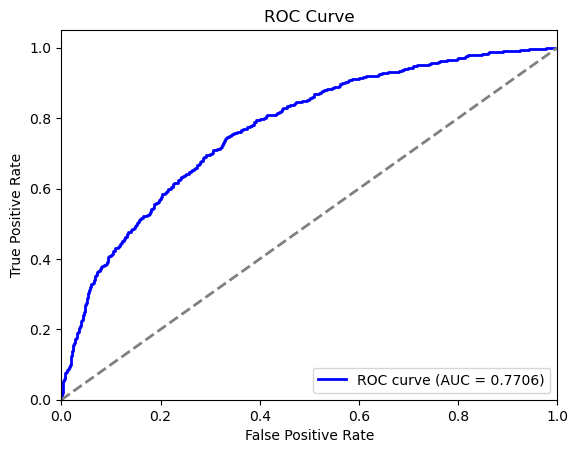

AUC Value: 0.7706
Random Forest Confusion Matrix:
 [[2316   79]
 [ 323  282]]
Random Forest Model Accuracy: 0.8660


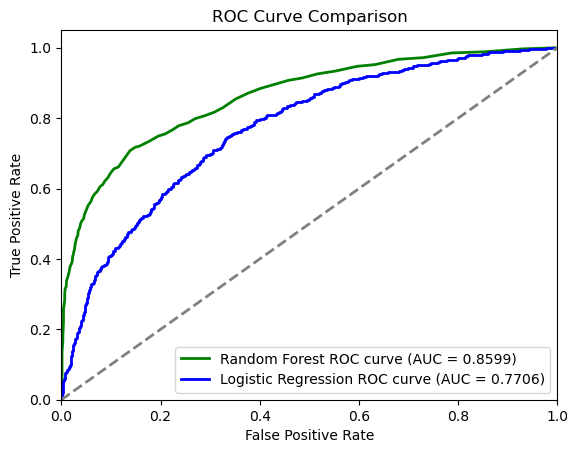

Logistic Regression Model Accuracy: 0.8100
Random Forest Model Accuracy: 0.8660


In [9]:

# Load necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc  # For evaluation metrics
import statsmodels.api as sm  # For model summary

# 1. Reading the Data
# Replace 'file_path.csv' with the actual file path of your dataset
data = pd.read_csv("C:\\Users\\HP\\Downloads\\Customer Churn.csv")


# Check the structure of the dataset
data.info()

# 2. Exploratory Data Analysis (EDA)
# 2.1 Summary Statistics
print(data.describe())

# 2.2 Checking the Distribution of the Target Variable (Exited)
sns.countplot(x='Exited', data=data, palette='Blues')
plt.title('Distribution of Exited (Churn)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


# 2.5 Correlation Analysis
# Correlation matrix for numeric variables
numeric_vars = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
cor_matrix = numeric_vars.corr()

# Plotting correlation matrix
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# 3. Data Preprocessing
# Convert categorical variables to numeric using one-hot encoding or label encoding
data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
data['HasCrCard'] = data['HasCrCard'].astype('category').cat.codes
data['IsActiveMember'] = data['IsActiveMember'].astype('category').cat.codes
data['Exited'] = data['Exited'].astype('category').cat.codes  # Convert target variable to numeric

# Check for any missing values
print(data.isna().sum())

# 4. Splitting the Data into Training and Testing Sets
X = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

# 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 5. Building the Logistic Regression Model
log_reg = sm.Logit(y_train, sm.add_constant(X_train))  # Adding constant for intercept
model = log_reg.fit()

# Summary of the model to check the coefficients
print(model.summary())

# 6. Making Predictions
predictions_prob = model.predict(sm.add_constant(X_test))  # Get predicted probabilities
predictions = np.where(predictions_prob > 0.5, 1, 0)  # Convert probabilities to binary output (0 or 1)

# 7. Evaluating the Model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', conf_matrix)

# 8. Model Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.4f}')

# 9. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC Value: {roc_auc:.4f}')


# In[ ]:


# In[2]:


# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 10. Building the Random Forest Model
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# 11. Making Predictions with the Random Forest Model
rf_predictions = rf_model.predict(X_test)
rf_predictions_prob = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# 12. Evaluating the Random Forest Model
# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print('Random Forest Confusion Matrix:\n', rf_conf_matrix)

# Accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')

# ROC Curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions_prob)
rf_auc = auc(rf_fpr, rf_tpr)

# Plotting the ROC Curve for Random Forest
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label=f'Random Forest ROC curve (AUC = {rf_auc:.4f})')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Comparison of Accuracy Measures
print(f'Logistic Regression Model Accuracy: {accuracy:.4f}')
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')





In [12]:
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree
from sklearn.ensemble import RandomForestClassifier  # For Random Forest
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.metrics import accuracy_score  # For evaluating the models



In [13]:
# Initialize the models
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [14]:
# Fit the models on the training data
log_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions on the test data
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [16]:
# Evaluate accuracy of each model
log_reg_acc = accuracy_score(y_test, log_reg_pred)
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)
dt_acc = accuracy_score(y_test, dt_pred)

# Print the accuracy of each model
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Logistic Regression Accuracy: 0.7887
Random Forest Accuracy: 0.8680
Gradient Boosting Accuracy: 0.8703
Decision Tree Accuracy: 0.7880


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix and Classification Report for each model
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']
predictions = [log_reg_pred, rf_pred, gb_pred, dt_pred]

for model, pred in zip(models, predictions):
    print(f"Evaluation for {model}:\n")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print("="*50)

Evaluation for Logistic Regression:

[[2340   55]
 [ 579   26]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2395
           1       0.32      0.04      0.08       605

    accuracy                           0.79      3000
   macro avg       0.56      0.51      0.48      3000
weighted avg       0.70      0.79      0.72      3000

Evaluation for Random Forest:

[[2318   77]
 [ 319  286]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2395
           1       0.79      0.47      0.59       605

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.85      3000

Evaluation for Gradient Boosting:

[[2318   77]
 [ 312  293]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2395
           1       0.79      0.48      0.60       605

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


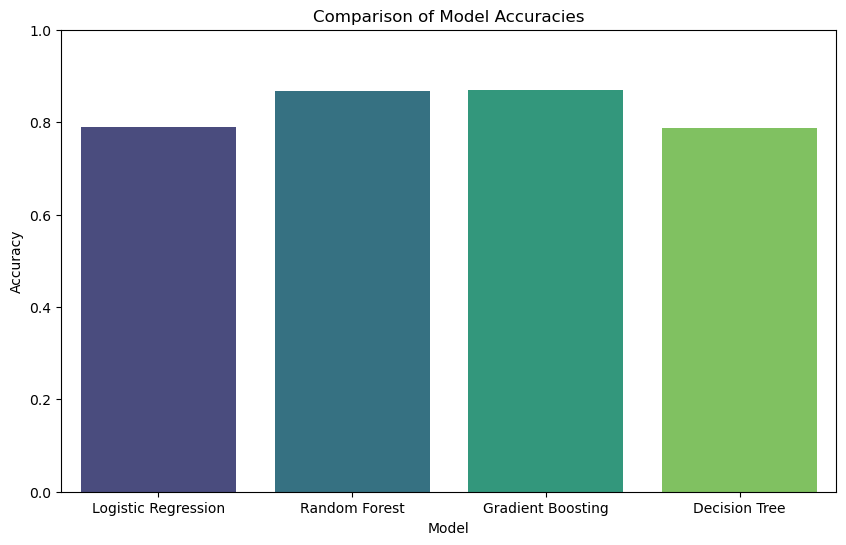

In [18]:
# 7. Plotting the accuracies of all models on one axis
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']
accuracies = [log_reg_acc, rf_acc, gb_acc, dt_acc]

plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')

# Adding title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range between 0 and 1

# Show the plot
plt.show()

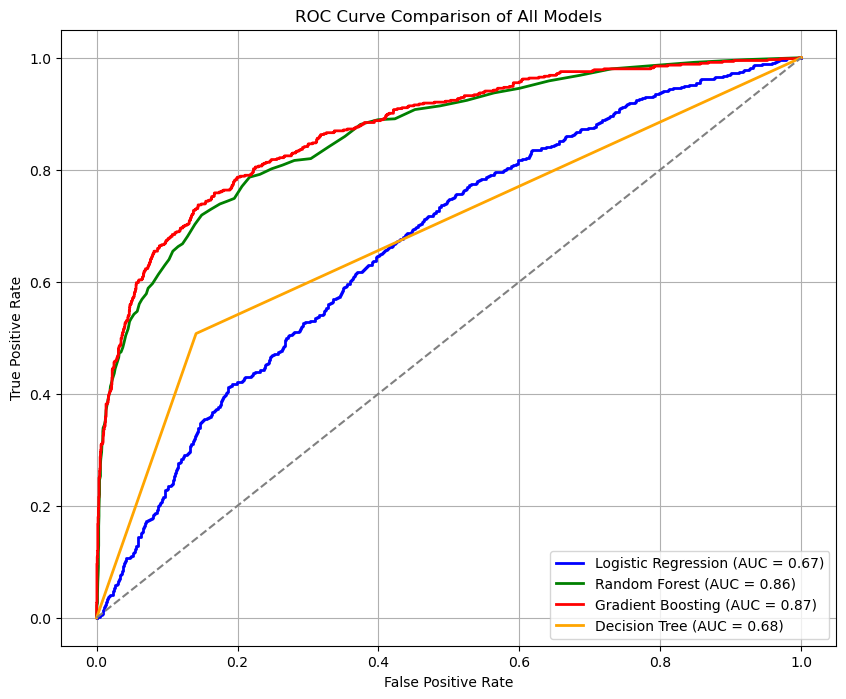

In [20]:
 Predict probabilities for the ROC curve
log_reg_prob = log_reg_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
gb_prob = gb_model.predict_proba(X_test)[:, 1]
dt_prob = dt_model.predict_proba(X_test)[:, 1]

Compute ROC curve and AUC for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)

roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_dt = auc(fpr_dt, tpr_dt)

Plot ROC curves for all models on the same axis
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line (random classifier) for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the plot
plt.title('ROC Curve Comparison of All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()